# Week 11

After last week's Code Café, we'll try to ease back into more complicated topics. This practical covers **string formatting, itertools, iterators, generators and classes**.

## String formatting

As you have probably noticed, there are several ways to print, assign and combine strings. The most simple option is to convert anything that is not a string to a string and use the `+` operator:

In [1]:
num = 1
first_string = 'Partial text'
string_to_add = 'with a number:'
print(first_string + ' ' + string_to_add + ' ' + str(num))

Partial text with a number: 1


As the `print()` function automatically puts spaces between given values, we can aldo do it like this:

In [2]:
print(first_string, string_to_add, num)

Partial text with a number: 1


However, it is not always the cleanest or easiest way to print things, especially if you have many variables to write somewhere (like whole reports or tables) and you cannot use `print()`. The most recent (*and probably convenient*) is the [f-string](https://docs.python.org/3/tutorial/inputoutput.html) method. Here, the `f` letter is written before parentheses, and any other elements are automatically inserted using `{}` brackets. Let's look at our example again:

In [7]:
print(f'{first_string} {string_to_add} {num}')

Partial text with a number: 1


In [14]:
var = 1.99999999
f'number is {var:.2f}, number plus one is {(var + 1):.5f}'

'number is 2.00, number plus one is 3.00000'

In [18]:
var = -1
print(f'The value of {'positive 'if var > 0 else 'negative'}')

The value of negative


In [19]:
text = 'some text'
print(f'{text} in uppercase is {text.upper()}')

some text in uppercase is SOME TEXT


In [27]:
print(f"""first line
second line
""")

first line
second line



That's better!

However, f-strings offer even more capabilities - they can be used with additional keywords which are added after the `:` symbol:
- Value padding: all values will take at least that much space, useful in tables. For example, `f'numbers: {num:5} = {num_word:5}'`
- Value rounding for floats. For example, `f'the value rounded to 2 digits after the point is {float_val:.2f}'`
- Printing both the variable name and value: `f'The name-value pair is {var=}'`. This is mostly useful for debugging.
- You can also include if-else expressions: `f'the answer is {'yes' if num == 1 else 'no'}'`
- Or include other calculations (but always test it before blindly using, as some functions may not work!): `f'Lowercased: {text.lower()}; uppercased: {text.upper()}'`
- Finally, multi-line strings are supported using tripple parentheses:
```python3
f'''First line
Line 2
Another line
...'''
```

### Exercises
1. Print all names and numbers of days of the week with a separator inbetween and padded values, so all separators line up. It should look something like:
```cmd
Monday    1
Tuesday   2
Wednesday 3
...
```
2. Write a function that prints a list of random floats in a given range with a precision of 3 characters after the point. The number of floats, range start and range end is given as a parameter. Use a list comprehension and the `random` in-built package to get the list of random numbers.
3. Generate and print a sales report for one product, using a single f-string. All (if any) calculations have to take place in the f-string itself.
The report has to look like this:

```cmd
Product Report for WIRELESS HEADPHONES
--------------------------------------
Total Sales (before discount): $467,735.57
Total Sales (after 10% discount): $420,961.99
Profit: $217,515.24

Details:
 - Units Sold: 5,843
 - Unit Cost: $35.75
 - Total Cost: $208,152.25`
```

Variables to use:
```python
product_name = "Wireless Headphones"
units_sold = 5843
unit_price = 79.99
discount = 0.1  # 10% discount
cost_per_unit = 35.75
```

The total sales amount is `units_sold * unit_price`, the profit is discounted sales minus total cost, with a conditional to show `"Profit"` if positive or `"Loss"` if negative.

In [37]:
days = ['monday', 'tuesday', 'wednesday']
sep = "|"
for i, day in enumerate(days):
    print(f'{day:15} {sep} is number {(i+1): 5}')

monday          | is number     1
tuesday         | is number     2
wednesday       | is number     3


In [40]:
# Write a function that prints a list of random floats in a given range with a 
# precision of 3 characters after the point. The number of floats, range start and range end is given as a parameter. 
# Use a list comprehension and the random in-built package to get the list of random numbers.
import random

# random.random()

def print_floats(number, range_start, range_end):
    number_list = []
    for n in range(number):
        generated_num = random.random()
        range_is = range_end - range_start
        output_num = generated_num * range_is + range_start
        number_list.append(output_num)
    return number_list
    
floats = print_floats(10, 15, 30)
for float_specific in floats:
    print(f'number is {float_specific:.3f}')

number is 21.746
number is 20.180
number is 20.430
number is 15.968
number is 17.679
number is 16.298
number is 21.738
number is 25.280
number is 15.165
number is 20.800


## Iterators and generators

***All generators are iterators, but not all iterators are generators.***

[Iterators](https://wiki.python.org/moin/Iterator) are objects that store a current value and output the next one when needed. They can be used in `for` loops in memory efficient ways. Actually, when you write `for x in my_list`, you are creating an iterator!

The easiest way to create an iterator is to put an iterable (a collection of items such as `list` or `tuple`) into the `iter()` function. Then, each next value can be obtained using the `next()` function. Note that in this way it is impossible to create infinite iterators, as you cannot have an infinite collection. After reaching the last value, the iterator will throw an `StopIteration` error:

In [41]:
my_list = ['a', 'b', 'c']
my_iterator = iter(my_list)
print(next(my_iterator))
print(next(my_iterator))
print(next(my_iterator))
print(next(my_iterator))

a
b
c


StopIteration: 

In [63]:
gen = [n for n in range(5)]

In [64]:
gen

[0, 1, 2, 3, 4]

If you would need to write your own custom iterator, you would need to use the `class` keyword with `__iter__()` and `__next__()` funcions:

```python
class CustomIterator:
  def __init__(self):
    self.stop = 100   # the biggest value that it can output
    self.val = 1      # starting value

  def __iter__(self):
    return self

  def __next__(self):
    to_return = self.val
    self.val += 1
    if self.val > self.stop:
      raise StopIteration  # you can also provide custom error message
    return to_return
```

**Generators** work in much the same way as iterators and have the same benefit of memory efficiency - they also return values one at a time. Generators are relatively simple to define, as they share the function syntax with the `yield` keyword. `yield` can turn most functions into generators if used instead of return. For example, this function would return 1, then 2, then 3 (and then, if asked again, would raise `StopIteration`):
```python
def number_gen():
    yield 1
    yield 2
    yield 3

gen = number_gen()
print(next(gen))  # 1
print(next(gen))  # 2
print(next(gen))  # 3
```

You can also use `yield` to create potentially infinite sequences. For example, a sequence of squared values can be created like this:
```python
def square_gen(x=0):
    while True:
        yield x**2
        x += 1
```
Note that, althouth this has `while True` inside, it will not run an infinite loop, but instead return next squared value when called, with no limit.

Just as there are list comprehensions, there are also generator comprehensions. They look like this:

```python
gen = (n for n in range(5))
```

## Itertools

The [itertools](https://docs.python.org/3/library/itertools.html) module contains common 'under-the-hood' options for iterator operations done in efficient ways. It's good for complex iterators, or in general when collections take up too much memory.

Some infinite iterators form itertools:
- `count` returns an infinite sequence from a starting number by a set step
- `cycle` repeats elements of an iterable
- `repeat` repeats the same value infinite times

Some finite itertools:
- `accumulate` sums values of an iterable (like a cumulative sum)
- `chain` joins multiple finite iterables into a single iterator
- `zip_longest` zips two iterables and fills the missing values by a specified placeholder

Some tools for combinatorics:
- `product` generates all possible combinations of a specified length of two input iterables
- `permutations` generates permutations without repeats, order matters
- `combinations` generates combinations without repeats of the same value, order doesn't matter
- `combinations_with_replacement` generates combinations with repeats, order doesn't matter


## Excercises

1. You have a bag with 5 red and 5 blue tokens. They can be taken out one by one. Without using combinatoric formulas, get all possible ways to take out these tokens, then calculate the probability that 3th, 4th and 5th tokens will be red.
2. Write a simple program which takes `input()` from a user. First, the user is asked to provide comma-separated names, then comma-separated numbers. After that, the program should output text formatted as a table with two columns, where first column contain names, and another one - numbers. Make sure to include all provided values.
3. Write an infinite generator for a Fibonnaci sequence. Print out the first 20 elements.
4. Using the provided example (with `class`), design a custom iterator that creates a converging sequence. The rule for the next element is $a_{n} = (n + 1)/2n^2$

In [76]:
import random
def shuffle():
    shuffled_list = []
    my_list = ['R','R','R','R', 'R', 'B', 'B', 'B', 'B','B']
    for i in range(len(my_list)):
        choice = random.choice(my_list)
        my_list.remove(choice)
        shuffled_list.append(choice)
    return shuffled_list

count = 0
for i in range(100000):
    shuffled_list = shuffle()
    if (shuffled_list[2] == 'R') and (shuffled_list[3] == 'R') and (shuffled_list[4] == 'R'):
        count += 1

In [77]:
count/100000

0.08282

In [81]:
from itertools import permutations
vals = permutations(['R','R','R','R', 'R', 'B', 'B', 'B', 'B','B'], 10)

In [84]:
def fibonacci():
    a, b = 0, 1
    while True:
        a, b = b, a+b
        yield a

gen = fibonacci()
for i in range(20):
    print(next(gen))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


In [86]:
import pandas as pd
df = pd.DataFrame()

In [88]:
df.columns

RangeIndex(start=0, stop=0, step=1)

## Classes
Python [classes](https://docs.python.org/3/tutorial/classes.html) allow building custom types of objects, with their own methods and parameters. You can think of them as blueprints for objects with specific properties, or dictionaries with preset keys and default values. For example, the pandas dataframe is a class!

Generic class syntax woud be:
```python
class SomeName:      #class definition
  def __init__(self, another_param):  #class initialization - "data" part
    self.param_property = another_param
    self.property_list = []
    ...
  
  def add_data(self, data):  #method definition - "functions" part
    self.property_list.append(data)
  ...  
```

In this case, `SomeName` is a custom class - you can generate objects with multiple parameters and methods quickly. The default `__init__()` method runs whenever you initialize an object of this class, which is usually used to set the required parameters to given or default values.

An object is created by **calling** the class:

```python
obj = SomeName('Param')  #creating an object of SomeName class
```

Parameters can be accessed by using `.`:
```python
obj.param_property
```

Methods can be accessed the same way, but include `()` and arguments like functions (because they are callable):
```python
obj.add_data(self, data)
```

**Example:** in Pandas, a dataframe is initialized by calling `pd.DataFrame()` (where `DataFrame` is the name of the class defined inside the main Pandas script), has parameters such as `.index`, and methods such as `.head()`.

- This is the core of [object-oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming), where everything is an object containing some data and methods.

### Exercises

1. Create a class called `Dog`. It should have a name, a breed with a default value of `'german_sheperd'`, and it should record steps it took to the left, right or if it stayed in place (-1, 1, and 0 respectively).
2. Create a method called `command`, which moves the dog to the **specified direction**.
3. Create a method called `free_walk`, which moves the dog to a **random direction**.
4. Walk the dog for some time using different approaches and make sure the movements are shown in the `record` parameter.
5. Think of how you can add movements to the front and back so the dog becomes 2-dimensional. This can be done in various ways. Let the dog walk on itself for 100 steps, and plot the recorded steps as position.

In [121]:
import random

class Dog:
    def __init__(self, name, breed = 'german_sheperd'):
        self.name = name
        self.breed = breed
        self.stepsX = []
        self.stepsY = []
        self.location = [(0, 0)]
    
    def command(self, step = (0, 0)):
        self.stepsX.append(step[0])
        self.stepsY.append(step[1])

    def free_walk(self):
        self.stepsX.append(round(random.random() * 2 - 1, 0))
        self.stepsY.append(round(random.random() * 2 - 1, 0))
    
    def where_was_i(self):
        for x, y in zip(self.stepsX, self.stepsY):
            _x = self.location[-1][0] + x
            _y = self.location[-1][1] + y
            self.location.append((_x, _y))

In [122]:
mydog = Dog('Brusius')

In [124]:
mydog.location

[(0, 0)]

In [125]:
for i in range(100):
    mydog.free_walk()

In [127]:
mydog.where_was_i()

Text(0.5, 1.0, "Brusius's morning walk")

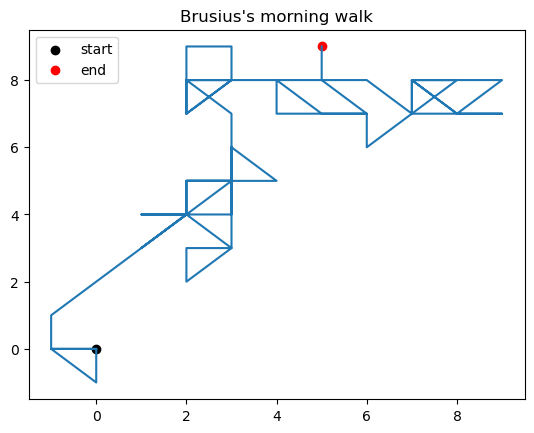

In [137]:
import matplotlib.pyplot as plt
x = [loc[0] for loc in mydog.location]
y = [loc[1] for loc in mydog.location]
plt.plot(x, y)
plt.scatter(mydog.location[0][0], mydog.location[0][1], c = 'k', label = 'start')
plt.scatter(mydog.location[-1][0], mydog.location[-1][1], c = 'r', label = 'end')
plt.legend()
plt.title(f'{mydog.name}\'s morning walk')